## Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [1]:
list_ = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [2]:
print(len(list_))
temp = 0
for el in list_:
    temp= temp + el
mean = temp / len(list_)
mean

21


73.14285714285714

In [3]:
import numpy as np
import math
ar = np.array(list_)
ar.mean()

73.14285714285714

In [4]:
temp = 0
for el in list_:
    temp = temp + (el-mean)**2
sigma = temp/len(list_)
sigma_un = temp/(len(list_)-1)
std_= math.sqrt(sigma)
std_un= math.sqrt(sigma_un)
print(sigma, sigma_un, std_, std_un)

2135.074829931973 2241.8285714285716 46.20686994302874 47.34795213553139


In [5]:
print(ar.var(ddof=0), ar.var(ddof=1),ar.std(ddof=0), ar.std(ddof=1) )

2135.0748299319725 2241.828571428571 46.206869943028735 47.347952135531386


### Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [6]:
def moda(list_):
    num = {}
    for el in list_:
        if el not in num:
            num[el] = 0
        num[el] += 1
    nmax = [(k , num[k])for k,num[k] in num.items() if num[k] == max(num.values())]
    return nmax
print(moda(list_))  

import collections
print (collections.Counter(list_).most_common(1))

[(75, 2), (65, 2)]
[(75, 2)]


Медиана — такое значение  𝑡 , что половина элементов из выборки меньше, либо равна  𝑡 , и, соответственно, половина больше, либо равна  𝑡 .

Медиана представляет собой середину выборки: если отсортировать элементы выборки по возрастанию, то медиана приходится на середину.

Медиана может приходиться как на промежуток между элементами выборки, так и на конкретный элемент.

In [7]:
def median(list_):
    half = len(list_) // 2
    list_.sort()
    if not len(list_) % 2:
        return (list_[half - 1] + list_[half]) / 2.0
    return list_[half]

In [8]:
med = median(list_)
med

70

In [9]:
np.median(ar,axis = 0)

70.0

In [10]:
def quantile(list_, q):
    if q ==1 : d = 4
    elif q == 2 : d = 2
    elif q == 3 : d = 4/3
    else: q = 2        
    dd = int(len(list_) // d)
    l= list_.copy()
    if not len(l) % 2:
        return (l[dd - 1] + l[dd]) / 2.0
    return l[dd]

In [11]:
l= list_.copy()
print(l)
print(quantile(list_,1),quantile(list_,2) , quantile(list_,3))


[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]
45 70 84


In [12]:
print(np.quantile(ar, 0.25), np.quantile(ar, 0.5), np.quantile(ar, 0.75))

45.0 70.0 84.0


In [13]:
np.quantile(list_, [0.25, 0.75])

array([45., 84.])

In [14]:
import seaborn as sns

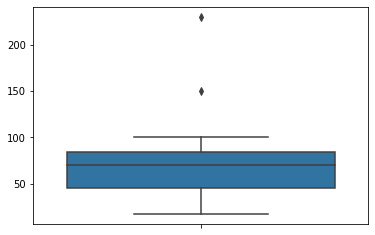

In [15]:
sns.boxplot(list_, orient='v')

In [16]:
q1 = np.quantile(ar, 0.25)
q3 = np.quantile(ar, 0.75)

In [17]:
iqr = q3-q1

In [18]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

In [19]:
s=[el for el in list_ if el<q1 - 1.5 * iqr or el>q1 + 1.5 * iqr]
len(s)

2

### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Na = N, Nb = N, Nc = 2N - кол-во студентов на факультетах, всего студентов 4N

dNa = 0.8N, dNb = 0.7N, dNc = 0.9N

Pa = 0.8N/4N = 0.2, Pb = 0.175, Pc = 0.225